In [3]:
using Plots
using LinearAlgebra

In [21]:
function odesolve(x,y)
N  = 1000;
dt = 0.01;
x_data   = zeros(N)
y_data   = zeros(N)
x_data[1] = x
y_data[1] = y
for j=1:N-1   
    x_new=x + dt*( -x*(1-x+3*y))
    y_new=y + dt*((3 + x − 3*y)*y)
    x_data[j] = x_new
    y_data[j] = y_new
    x = x_new
    y = y_new
end
return x_data,y_data
end

odesolve (generic function with 1 method)

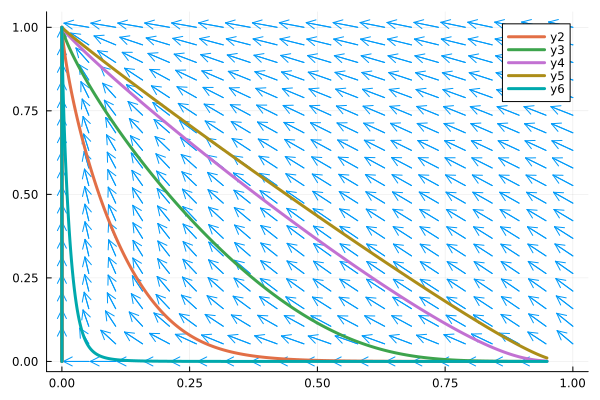

In [22]:
Nl=20
x=range(0,1,length=Nl)
pts = vec([(x[i],x[j]) for i=1:length(x), j=1:length(x)])
df(x,y)= -1*x*(1-x+3*y)/(20*sqrt(((x*(1-x+3*y)))^2+(y*(3+x-3*y))^2)),y*(3+x-3*y)/(20*sqrt(((x*(1-x+3*y)))^2+(y*(3+x-3*y))^2))
quiver(pts,quiver=df)
data_x=[0.90,0.90,0.95,0.95,0.95]
data_y=[0.000001,0.0001,0.001,0.01,0.0000000001]
for i in 1:length(data_x)
xdata,ydata = odesolve(data_x[i],data_y[i])
plot!(xdata,ydata,linewidth = 3)
end
plot!()

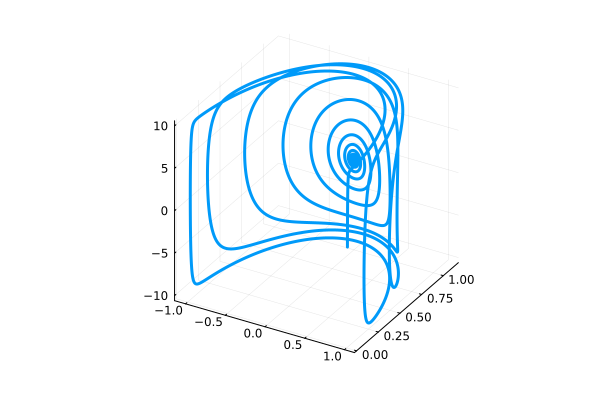

In [24]:
Ni=10000
dt=0.001
xi=zeros(Ni)
yi=zeros(Ni)
zi=zeros(Ni)
xi[1]=1.0
yi[1]=0.01
zi[1]=1.2
mu=10
for i in range(1,Ni-1,step=1)
    xi[i+1]=xi[i]-(1.5*xi[i]*(1-xi[i]^2+yi[i]^2)+sqrt(1.5)*zi[i]*(yi[i]^2) )*dt
    yi[i+1]=yi[i]+dt*(1.5*yi[i]*(1+xi[i]^2-yi[i]^2) + sqrt(1.5)*(xi[i]*yi[i]*zi[i]))
    zi[i+1]=zi[i]+dt*(sqrt(6)*(mu^2-zi[i]^2)*xi[i])
end
plot(xi,yi,zi,linewidth=3,label="")
